In [86]:
from math import tanh
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

def a(S_r, b, c, d):
    return S_r - b * np.tanh(c * d)

def b(S_r, F_bar):
    return (S_r - max(S_r - F_bar, 0)) / F_bar

def B(g, a, b, c, d):
    return a + b * np.tanh(-c * (g - d))

def B_equiv(g, S_r, b):
    _c = 1.0
    _d = 1.0
    _a = a(S_r, b, _c, _d)
    return B(g, _a, b, _c, _d)

def B_approx(g, S_r, b):
    return S_r - b * (1523/2000 - (3/4) * (1 - g))

def F(credit_supply, space_pledged, history_size, min_replication_factor):
    return credit_supply / max((space_pledged/min_replication_factor - history_size), 1)

<img src="media/beta.png" height=200>

In [87]:
# N_YEARS = 4
# BLOCK_TIME_IN_SECONDS = 10
# BLOCKS_PER_DAY = 24 * 60 * 60 / BLOCK_TIME_IN_SECONDS
# BLOCKS_PER_YEAR = BLOCKS_PER_DAY * 365.25
# BLOCKS_PER_N_YEARS = BLOCKS_PER_YEAR * N_YEARS
# MAX_DISBURSAL_DURING_N_YEARS = 500_000_000 # 500 Million
# MAX_AVG_BLOCK_REWARD_DURING_N_YEARS = MAX_DISBURSAL_DURING_N_YEARS / BLOCKS_PER_N_YEARS
# MIN_DISBURSAL_DURING_N_YEARS = MAX_DISBURSAL_DURING_N_YEARS / 10
# MIN_AVG_BLOCK_REWARD_DURING_N_YEARS = MIN_DISBURSAL_DURING_N_YEARS / BLOCKS_PER_N_YEARS

KB = 2 ** (1 * 10)
MB = 2 ** (2 * 10)
GB = 2 ** (3 * 10)
TB = 2 ** (4 * 10)
PB = 2 ** (5 * 10)
EB = 2 ** (6 * 10)
ZB = 2 ** (7 * 10)
world_datasphere_size = 15 * ZB
max_credit_supply = 1_000_000_000
max_block_size = 3.75 * MB # HACK

g = np.linspace(0, 1, 21)
S_r = np.linspace(0, 100, 50)
#_F = st.beta.rvs(a=1, b=1_000_000, size=300) * max_credit_supply
_F = np.log(np.linspace(1.01, 10, 1000)) 

data = []
for g_i in g:
    for S_r_i in S_r:
        for _f in _F:
            Fbar = _f * max_block_size
            _b = b(S_r_i, Fbar)
            reward_approx = B_approx(g_i, S_r_i, _b)
            reward_true = B_equiv(g_i, S_r_i, _b)
            reward_error = reward_true - reward_approx
            data.append(dict(g=g_i, S_r=S_r_i, F=_f,
                             Fbar=Fbar, b=_b, 
                             B_approx=reward_approx, 
                             B_true=reward_true, 
                             B_error=reward_true-reward_approx,
                             B_rel_error=(reward_true-reward_approx)/reward_true
                             ))

df = pd.DataFrame(data)

/var/folders/y4/dvc6qr5j30s3frwztjt5shg40000gn/T/ipykernel_62187/4105171209.py:41: RuntimeWarning:

invalid value encountered in scalar divide



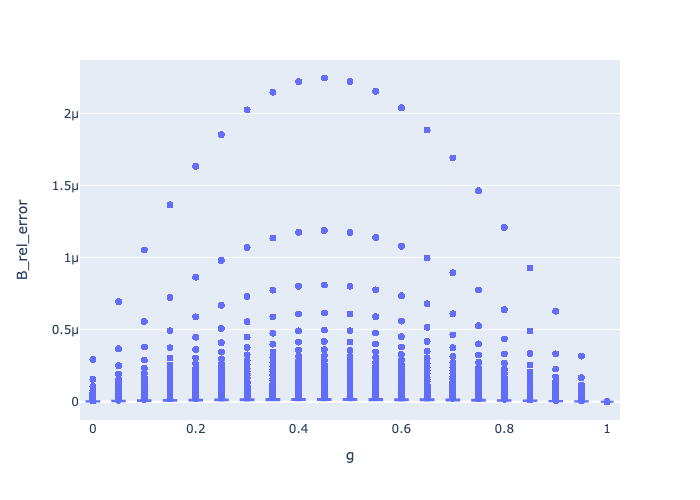

In [88]:
px.box(df, x='g', y='B_rel_error')

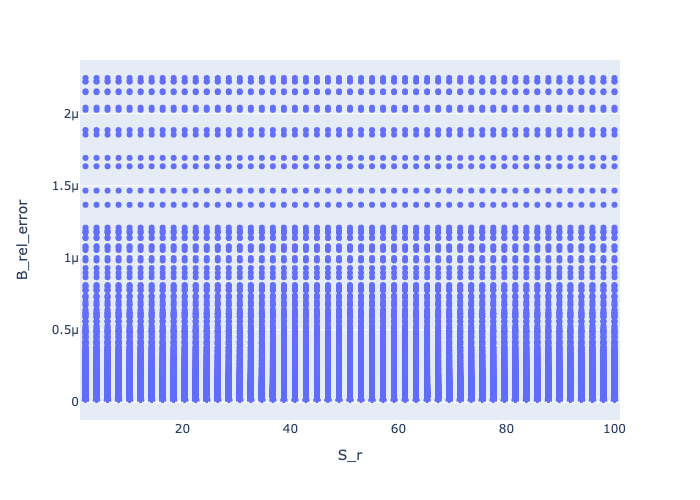

In [89]:
px.box(df, x='S_r', y='B_rel_error')

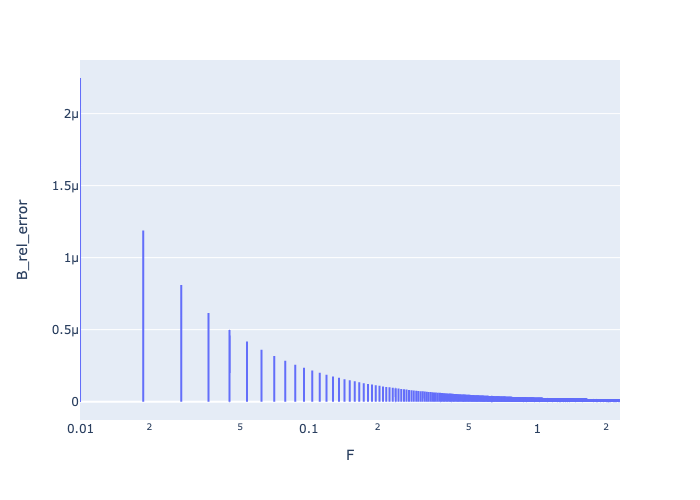

In [90]:
px.box(df, x='F', y='B_rel_error', log_x=True)

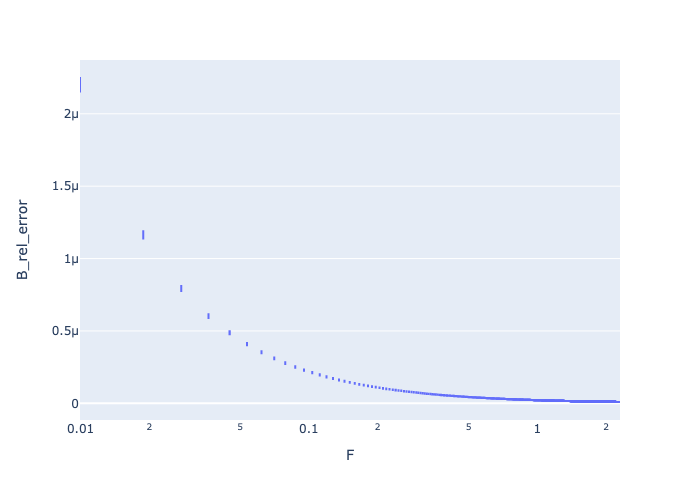

In [96]:
px.box(df.query("g > 0.4 & g < 0.6"), x='F', y='B_rel_error', log_x=True)

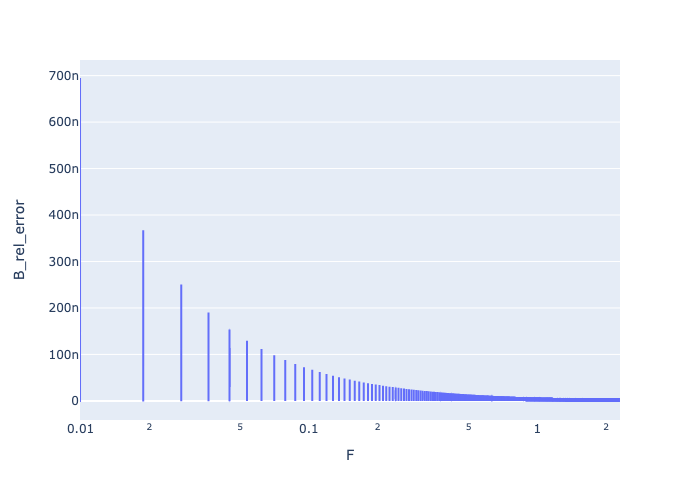

In [95]:
px.box(df.query("g < 0.1 | g > 0.9"), x='F', y='B_rel_error', log_x=True)